<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use the text data to build simple feed-forward Neural Nets and benchmark against the base ML models.</span></p>
    </h4>

In [1]:
# imports

import os
import math
import random
import warnings
from time import time
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import tensorflow

tqdm.pandas()
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\surya\anaconda3\envs\full\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# reproducibility
seed = 7
random.seed(seed)
tensorflow.random.set_seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import & Analyse the data.</span></strong></li>
</ul></h3>

In [3]:
dataset = pd.read_excel('./data/cleaned_data.xlsx')
dataset.sample(10)

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
5720,expense report,\n\nreceived from: ytqhfmwi.itnakpmc@gmail.com...,ytqhfmwi itnakpmc,GRP_68,316,32,14,2,gmail.com,expense report,65,31,expense report submit saves submit ts happened...,expense report,85,12,14,2
6359,job HostName_1019failagain_1 failed in job_sch...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_60,120,11,78,8,job HostName,job HostName,57,14,job hostname ailagain failed job scheduler,job hostname ailagain failed job scheduler,42,6,42,6
3038,ticket update on inplant_864348,ticket update on inplant_864348,fumkcsji sarmtlhy,GRP_0,31,4,31,4,ticket update on inplant,ticket update on inplant,0,3,ticket update inplant,ticket update inplant,21,3,21,3
526,password reset,password reset,phksfqxe wkbovsmu,GRP_0,14,2,14,2,password reset,password reset,0,0,password reset,password reset,14,2,14,2
7826,engineering_tool error,engineering_tool error,mofjyqrh bcyzmkia,GRP_0,22,2,22,2,tool error,tool error,0,1,engineering tool error,engineering tool error,22,3,22,3
7798,dell 7350: pc boot up failure.urgent,dell 7350: pc boot up failure.\n-had to try r...,qwreamdz pmarxvtk,GRP_3,260,47,38,6,boot up failure,dell,23,27,dell pc boot failure try restart multiple time...,dell pc boot failure urgent,136,21,27,5
7124,"problem with wlan in germany, germany for the ...","problem with wlan in germany, germany for the ...",yevirgnl ylhogjct,GRP_4,133,19,62,10,problem with wlan in germany,germany for the attached device,34,15,problem wlan germany attached device contact i...,problem wlan germany attached device,59,9,36,5
1050,delivery blocked status :blocked,same issue with inc1561759. i have found anoth...,nwlhcfpa zdlfmthq,GRP_13,217,33,32,4,issue,delivery blocked status,5,23,issue inc found another delivery status blocke...,delivery blocked status,130,19,23,3
3471,unable to access bex analyzer,unable to access bex analyzer as nothing happe...,jfgkmauh wfrgkejq,GRP_19,91,14,30,5,unable to access bex analyzer,unable to access bex analyzer,11,11,unable access bex analyzer notng happens click...,unable access bex analyzer,65,11,26,4
6676,symantec software message,\n\nreceived from: doxmlcpr.xjheyscu@gmail.com...,doxmlcpr xjheyscu,GRP_0,153,20,25,3,attached symantec message,symantec software message,0,17,see attached symantec message keep getting eve...,symantec software message,68,11,25,3


In [4]:
dataset.isna().sum()

short_description              0
description                    0
caller                         0
group                          0
char_length                    0
word_length                    0
short_char_length              0
short_word_length              0
description_keywords           7
short_description_keywords    35
group_code                     0
char_length_bins               0
cleaned_description            0
cleaned_short_description      0
cleaned_char_length            0
cleaned_word_length            0
cleaned_short_char_length      0
cleaned_short_word_length      0
dtype: int64

In [5]:
dataset[dataset.isna().any(axis=1)].to_csv('./data/missing_keywords.csv')
dataset[dataset.isna().any(axis=1)]  # check rows with missing values

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
485,: k-bngell-cgdaytshqsd <k-bngell-cgdaytshqsd@c...,\n\nreceived from: lvxakohq.tsfnhowj@gmail.com...,lvxakohq tsfnhowj,GRP_19,210,33,69,3,rao left company. with kind,NaN,11,22,pl add name ts team also need administrative c...,kbngellcgdaytshqsd,104,17,18,1
756,pc name,\n\nreceived from: koahsriq.wdugqatr@gmail.com...,koahsriq wdugqatr,GRP_28,323,37,7,2,service tag,NaN,21,33,need new pc name service tag fykssc administra...,pc name,99,14,7,2
1294,"dn 9169508476,t/o 642392",\n\nreceived from: gjtyswkb.dpvaymxr@gmail.com...,gjtyswkb dpvaymxr,GRP_6,129,19,24,3,received,NaN,56,15,dear chk dn help check urgent,dnt,29,6,3,1
1331,"apac, company: multiple switches went down at ...",company-ap-chn-apac-company-fpsf-2960s-access-...,mnlazfsr mtqrkhnx,GRP_8,150,3,68,12,NaN,apac,72,17,companyapchnapaccompanyfpsfaccessswcompanyapch...,apac company multiple switches went atpm et,103,1,43,7
1641,need help,\n\nreceived from: axcbfuqo.yiagubvh@gmail.com...,axcbfuqo yiagubvh,GRP_0,376,65,9,2,good morning,NaN,0,35,trouble password changed password possibility ...,need help,161,22,9,2
1823,bgflmyar.xgufkidq@gmail.com wanted to check if...,bgflmyar.xgufkidq@gmail.com wanted to check if...,olckhmvx pcqobjnd,GRP_0,83,13,83,13,tool on his phone,NaN,0,10,wanted check login hr tool phone,wanted check login hr tool phone,32,6,32,6
2397,need your help!!,\n\nreceived from: ezwcpqrh.bnwqaglk@gmail.com...,ezwcpqrh bnwqaglk,GRP_0,571,93,17,3,emal thru the web mail,NaN,0,44,desk sent ts emal thru web mail open ms office...,need help,291,46,9,2
2437,changes in ad,"hi, there,\nmy reporting line in the outlook o...",ywbnzxud qzwrynux,GRP_2,246,44,13,3,outlook organization system is wrong,NaN,12,25,reporting line outlook organization system wro...,changes ad,137,19,10,2
2738,"cann't do ""mb31"" for po115890552","there is a po 226901663 in plant_282.\nnow,we...",jerydwbn gdylnaue,GRP_45,100,19,33,5,plant,NaN,40,11,po plant nowwe need sp outbut ca t mb help,cann mb po,42,10,10,3
2954,\n\nreceived from: yzbjhmpw.vzrulkog@gmail.com...,\n\nreceived from: yzbjhmpw.vzrulkog@gmail.com...,yzbjhmpw vzrulkog,GRP_0,1167,131,1167,131,company shared services gmbh geschäftsführer,NaN,0,62,png id fdbf mit freundlichem gru ulrike amann ...,png id fdbf mit freundlichem gru ulrike amann ...,736,93,736,93


In [6]:
le = LabelEncoder()
dataset['group_code'] = le.fit_transform(dataset.group)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   short_description           8435 non-null   object
 1   description                 8435 non-null   object
 2   caller                      8435 non-null   object
 3   group                       8435 non-null   object
 4   char_length                 8435 non-null   int64 
 5   word_length                 8435 non-null   int64 
 6   short_char_length           8435 non-null   int64 
 7   short_word_length           8435 non-null   int64 
 8   description_keywords        8428 non-null   object
 9   short_description_keywords  8400 non-null   object
 10  group_code                  8435 non-null   int32 
 11  char_length_bins            8435 non-null   int64 
 12  cleaned_description         8435 non-null   object
 13  cleaned_short_description   8435 non-null   obje

In [7]:
le.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [8]:
X = np.array(dataset.cleaned_short_description)
y = np.array(dataset.group_code)
X.shape, y.shape

((8435,), (8435,))

In [9]:
from keras.utils import np_utils
y_dummy_coded = np_utils.to_categorical(y)
y[0], y_dummy_coded[0]

(0,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy_coded, test_size=.2, random_state=seed)  # splits are stratified by y

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6748,), (1687,), (6748, 74), (1687, 74))

In [12]:
X_train[0], y_train[0]  # check sample

('user needs help login mii',
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [13]:
# TODO: Check the distributions of groups in training and testing sets, i.e, if they vary too much
# stratify by y if required during splits
# or data augmentation to upsample minority classes to balance the group distributions

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Tokenize and pad sequences</span></strong></li>
</ul></h3>

In [14]:
# define params
NUM_WORDS = 20000
EMBEDDING_DIM = 300
MAX_LEN = 100 # dataset['word_length'].max()
MAX_LEN

100

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
X_train_tokens[0], X_test_tokens[0]

([20, 126, 39, 15, 120], [3708, 495, 52, 54])

In [16]:
y_train[0], y_test[0]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [17]:
# pad sequences to cut longer texts to a uniform length and pad the sentences that are shorter than that with <PAD> token

# using just 20 words from each headline will severely limit the information that is 
# available to the model and affect performance although the training will be faster
X_train_padded = pad_sequences(X_train_tokens,
                               padding='post',
                               truncating='post',
                               maxlen=MAX_LEN)
X_test_padded = pad_sequences(X_test_tokens,
                              padding='post',
                              truncating='post',
                              maxlen=MAX_LEN)


print(f'X train:  {X_train_padded.shape}\nX test:   {X_test_padded.shape}')

X train:  (6748, 100)
X test:   (1687, 100)


In [18]:
pprint(X_train_padded[0], compact=True)

array([ 20, 126,  39,  15, 120,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])


In [19]:
WORD_TO_INDEX = tokenizer.word_index
# pprint(WORD_TO_INDEX, compact=True)
pprint(list(WORD_TO_INDEX.keys())[:100], compact=True)

['job', 'scheduler', 'password', 'erp', 'unable', 'failed', 'tool', 'reset',
 'sid', 'account', 'issue', 'access', 'outlook', 'hostname', 'login', 'locked',
 'error', 'ticket', 'working', 'user', 'update', 'vpn', 'skype', 'engineering',
 'need', 'crm', 'company', 'et', 'windows', 'management', 'email', 'abended',
 'server', 'connect', 'new', 'collaboration', 'platform', 'network', 'help',
 'system', 'open', 'unlock', 'request', 'printer', 'software', 'outage', 'hr',
 'mit', 'log', 'using', 'able', 'usa', 'pc', 'plant', 'passwords', 'site',
 'inplant', 'probleme', 'nicht', 'call', 'laptop', 'eu', 'circuit', 'business',
 'production', 'problem', 'change', 't', 'phone', 'client', 'mobile',
 'telephony', 'germany', 'urgent', 'work', 'device', 'create', 'report', 'get',
 'install', 'order', 'uacyltoe', 'issues', 'print', 'emails', 'setup', 'ca',
 'message', 'since', 'fur', 'ts', 'inc', 'etcs', 'delivery', 'space',
 'connection', 'getting', 'wifi', 'check', 'ad']


In [20]:
VOCAB_SIZE = len(WORD_TO_INDEX) + 1
VOCAB_SIZE

5284

In [21]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def retrieve_description_feat(x, mapping=WORD_TO_INDEX) -> str:
    # increment 3 
    mapping = {k:(v + 3) for k, v in mapping.items()}
    mapping['<PAD>'] = 0
    mapping['<START>'] = 1
    mapping['<UNK>'] = 2
    inv_mapping = {v: k for k, v in mapping.items()}
    return str(" ".join(inv_mapping.get(i, '<NA>') for i in x))

retrieve_description_feat(X_test_padded[7])

'outlook job <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">GloVe Embeddings</span></strong></li>
</ul></h3>

In [22]:
EMBEDDING_DIM

300

In [23]:
def get_embedding_matrix(embedding_dim=EMBEDDING_DIM):
    embeddings = defaultdict()
    if embedding_dim == 200:
        file_path = f'./data/glove.6B.{embedding_dim}d.txt'
    elif embedding_dim == 300:
        file_path = f'./data/glove.840B.{embedding_dim}d.txt'
    for l in open(file_path, encoding='utf-8'):
        word = l.split(" ")[0]
        embeddings[word] = np.asarray(l.split(" ")[1:], dtype='float32')

    embeddings = dict(embeddings)

    # create a weight matrix for words in training docs
    embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

    for word, idx in WORD_TO_INDEX.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [24]:
# use pre-trained glove embedding matrix to initialize weights in our model
# embedding_matrix = get_embedding_matrix()
# embedding_matrix.shape

(20000, 300)

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Simple Feed-Forward Neural Net</span></strong></li>
</ul></h4>

In [25]:
# !pip install livelossplot
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm, unit_norm
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout, Embedding, LSTM, MaxPooling1D, Conv1D

In [26]:
NUM_CLASSES = len(le.classes_)
VOCAB_SIZE, MAX_LEN, EMBEDDING_DIM, NUM_CLASSES

(5284, 100, 300, 74)

In [27]:
# define model

model1 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(1024, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [28]:
# Define Callbacks and a few helper functions

# simplify the training log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f}", end =" >|> \n" ))

# early stopping
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=7,
                              verbose=0, 
                              restore_best_weights=True)

# learning rate reduction
lr_reduce_on_plateau = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.4,
                                            min_lr=0.00001)

def plot_learning_curve(hist):
    sns.set()
    plt.figure(figsize=(5,5))
    train = hist.history['loss']
    val = hist.history['val_loss']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training Loss')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation Loss')
    plt.title("Loss vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [29]:
# !pip install nvidia-smi
!nvidia-smi

Thu Sep  9 20:11:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.68       Driver Version: 471.68       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   69C    P2    45W /  N/A |    592MiB /  8192MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
import gc
gc.collect()

8527

In [31]:
X_train[0]

'user needs help login mii'

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6748,), (6748, 74), (1687,), (1687, 74))

In [33]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("\nTraining on CPU:")
    h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.05523 >|> 
 ~| Epoch: 2 | Validation Loss: 1.70473 >|> 
 ~| Epoch: 3 | Validation Loss: 1.84240 >|> 
 ~| Epoch: 4 | Validation Loss: 1.87078 >|> 
 ~| Epoch: 5 | Validation Loss: 1.99186 >|> 
 ~| Epoch: 6 | Validation Loss: 2.15018 >|> 

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 7 | Validation Loss: 2.40383 >|> 
 ~| Epoch: 8 | Validation Loss: 2.56493 >|> 
 ~| Epoch: 9 | Validation Loss: 2.77454 >|> 

Training Done.


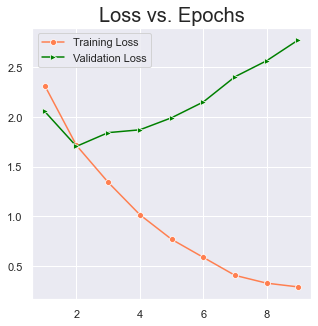

In [34]:
plot_learning_curve(h1)

In [35]:
loss, acc = model1.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 2s 30ms/step - loss: 1.7105 - accuracy: 0.6011
Testing Loss:  171.05472087860107
Testing Accuracy:  60.10670065879822


<h4><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>This model is clearly overfitting, we will add regularization to the next iteration
 </span></ul></h4>

In [36]:
# define model

model2 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [37]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 3.30325 >|> 
 ~| Epoch: 2 | Validation Loss: 4.45579 >|> 
 ~| Epoch: 3 | Validation Loss: 2.15719 >|> 
 ~| Epoch: 4 | Validation Loss: 4.03052 >|> 
 ~| Epoch: 5 | Validation Loss: 6.24599 >|> 
 ~| Epoch: 6 | Validation Loss: 4.43419 >|> 
 ~| Epoch: 7 | Validation Loss: 5.71169 >|> 

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 8 | Validation Loss: 3.24871 >|> 
 ~| Epoch: 9 | Validation Loss: 3.02679 >|> 
 ~| Epoch: 10 | Validation Loss: 1.88414 >|> 
 ~| Epoch: 11 | Validation Loss: 1.94441 >|> 
 ~| Epoch: 12 | Validation Loss: 2.28305 >|> 
 ~| Epoch: 13 | Validation Loss: 3.48404 >|> 
 ~| Epoch: 14 | Validation Loss: 3.57704 >|> 

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.
 ~| Epoch: 15 | Validation Loss: 2.14494 >|> 
 ~| Epoch: 16 | Validation Loss: 2.01291 >|> 
 ~| Epoch: 17 | Validation Loss: 2.13271 >|> 

Training Done.


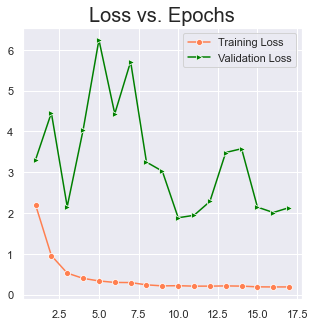

In [38]:
plot_learning_curve(h2)

In [39]:
loss, acc = model2.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 9ms/step - loss: 1.8436 - accuracy: 0.6343
Testing Loss:  184.36477184295654
Testing Accuracy:  63.42620253562927


In [40]:
# define model

model3 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(20, activation = 'relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [41]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.23535 >|> 
 ~| Epoch: 2 | Validation Loss: 1.99763 >|> 
 ~| Epoch: 3 | Validation Loss: 1.91403 >|> 
 ~| Epoch: 4 | Validation Loss: 1.91306 >|> 
 ~| Epoch: 5 | Validation Loss: 1.86180 >|> 
 ~| Epoch: 6 | Validation Loss: 1.85250 >|> 
 ~| Epoch: 7 | Validation Loss: 1.88047 >|> 
 ~| Epoch: 8 | Validation Loss: 1.86981 >|> 
 ~| Epoch: 9 | Validation Loss: 1.87520 >|> 
 ~| Epoch: 10 | Validation Loss: 1.94696 >|> 

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 11 | Validation Loss: 1.93896 >|> 
 ~| Epoch: 12 | Validation Loss: 1.97689 >|> 
 ~| Epoch: 13 | Validation Loss: 1.97018 >|> 

Training Done.


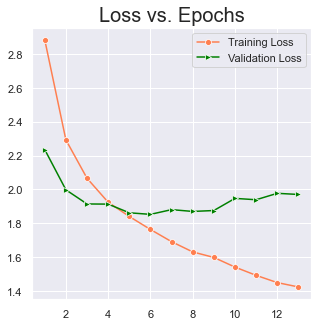

In [42]:
plot_learning_curve(h3)

In [43]:
loss, acc = model3.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 3ms/step - loss: 1.8462 - accuracy: 0.5910
Testing Accuracy:  59.098994731903076


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">LSTM</span></strong></li>
</ul></h4>

In [44]:
# define model

model4 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(128),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [45]:
EPOCHS = 50
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.52285 >|> 
 ~| Epoch: 2 | Validation Loss: 2.52519 >|> 
 ~| Epoch: 3 | Validation Loss: 2.51513 >|> 
 ~| Epoch: 4 | Validation Loss: 2.52780 >|> 
 ~| Epoch: 5 | Validation Loss: 2.51213 >|> 
 ~| Epoch: 6 | Validation Loss: 2.51352 >|> 
 ~| Epoch: 7 | Validation Loss: 2.51352 >|> 
 ~| Epoch: 8 | Validation Loss: 2.51131 >|> 
 ~| Epoch: 9 | Validation Loss: 2.51884 >|> 
 ~| Epoch: 10 | Validation Loss: 2.51460 >|> 
 ~| Epoch: 11 | Validation Loss: 2.51105 >|> 
 ~| Epoch: 12 | Validation Loss: 2.51569 >|> 
 ~| Epoch: 13 | Validation Loss: 2.50859 >|> 
 ~| Epoch: 14 | Validation Loss: 2.51237 >|> 
 ~| Epoch: 15 | Validation Loss: 2.50914 >|> 
 ~| Epoch: 16 | Validation Loss: 2.51337 >|> 
 ~| Epoch: 17 | Validation Loss: 2.51350 >|> 

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 18 | Validation Loss: 2.50952 >|> 
 ~| Epoch: 19 | Validation Loss: 2.51105 >|> 
 ~| Epoch: 20 | Validation Loss: 2.50

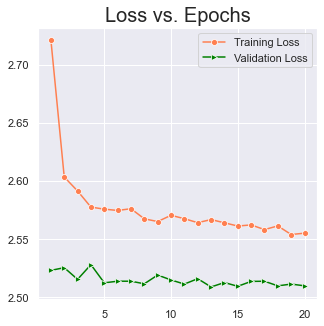

In [46]:
plot_learning_curve(h4)

In [47]:
loss, acc = model4.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 3s 50ms/step - loss: 2.4749 - accuracy: 0.4790
Testing Accuracy:  47.89567291736603


In [48]:
model5 = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=256, input_length=MAX_LEN),
    Dropout(0.25),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    LSTM(75),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [49]:
EPOCHS = 20
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU:
 ~| Epoch: 1 | Validation Loss: 2.43876 >|> 
 ~| Epoch: 2 | Validation Loss: 2.35651 >|> 
 ~| Epoch: 3 | Validation Loss: 2.29196 >|> 
 ~| Epoch: 4 | Validation Loss: 2.29362 >|> 
 ~| Epoch: 5 | Validation Loss: 2.25170 >|> 
 ~| Epoch: 6 | Validation Loss: 2.23292 >|> 
 ~| Epoch: 7 | Validation Loss: 2.20267 >|> 
 ~| Epoch: 8 | Validation Loss: 2.21217 >|> 
 ~| Epoch: 9 | Validation Loss: 2.14218 >|> 
 ~| Epoch: 10 | Validation Loss: 2.15464 >|> 
 ~| Epoch: 11 | Validation Loss: 2.15876 >|> 
 ~| Epoch: 12 | Validation Loss: 2.04002 >|> 
 ~| Epoch: 13 | Validation Loss: 2.06220 >|> 
 ~| Epoch: 14 | Validation Loss: 2.04322 >|> 
 ~| Epoch: 15 | Validation Loss: 2.01471 >|> 
 ~| Epoch: 16 | Validation Loss: 2.11217 >|> 
 ~| Epoch: 17 | Validation Loss: 2.07302 >|> 
 ~| Epoch: 18 | Validation Loss: 2.17744 >|> 
 ~| Epoch: 19 | Validation Loss: 2.07563 >|> 

Epoch 00019: ReduceLROnPlateau reduc

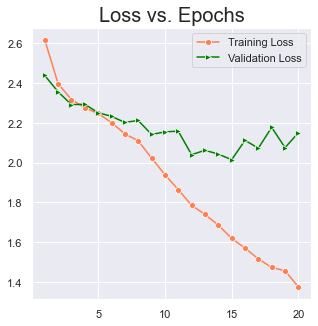

In [50]:
plot_learning_curve(h5)

In [51]:
loss, acc = model5.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 2s 41ms/step - loss: 2.1810 - accuracy: 0.5359
Testing Accuracy:  53.58625054359436


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use TfIdf vectors instead of Embedding Layer + Feature Selection</span></strong></li>
</ul></h4>

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# using 75-25 split instead of 50-50 split as we need more data to train neural nets
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(X, y, test_size=0.2, random_state=seed)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6748,), 
Test dataset shape: (1687,)


In [53]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2


kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ
}
vectorizer = TfidfVectorizer(**kwargs)
X_train_vec = vectorizer.fit_transform(X_train_vec)
X_test_vec = vectorizer.transform(X_test_vec)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6748, 4273), 
Test dataset shape: (1687, 4273)


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select best k features, with feature importance measured by f_classif
# Set k as 20000 or (if number of ngrams is less) number of ngrams   
selector = SelectKBest(f_classif, k=min(TOP_K, X_train_vec.shape[1]))
selector.fit(X_train_vec, y_train_vec)
X_train_vec = selector.transform(X_train_vec).astype('float32')
X_test_vec = selector.transform(X_test_vec).astype('float32')
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

print(f"Train dataset shape: {X_train.shape}, \nTest dataset shape: {X_test.shape}")

Train dataset shape: (6748,), 
Test dataset shape: (1687,)


In [55]:
model6 = Sequential([   
    Dense(64, activation='relu', input_shape=X_train_vec.shape[1:]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model6.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [56]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)
except Exception:
    print("Training on CPU:")
    h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.28758 >|> 
 ~| Epoch: 2 | Validation Loss: 2.00330 >|> 
 ~| Epoch: 3 | Validation Loss: 1.87182 >|> 
 ~| Epoch: 4 | Validation Loss: 1.77919 >|> 
 ~| Epoch: 5 | Validation Loss: 1.71226 >|> 
 ~| Epoch: 6 | Validation Loss: 1.67500 >|> 
 ~| Epoch: 7 | Validation Loss: 1.63292 >|> 
 ~| Epoch: 8 | Validation Loss: 1.61708 >|> 
 ~| Epoch: 9 | Validation Loss: 1.61062 >|> 
 ~| Epoch: 10 | Validation Loss: 1.62890 >|> 
 ~| Epoch: 11 | Validation Loss: 1.63128 >|> 
 ~| Epoch: 12 | Validation Loss: 1.64475 >|> 
 ~| Epoch: 13 | Validation Loss: 1.67110 >|> 
 ~| Epoch: 14 | Validation Loss: 1.70028 >|> 
 ~| Epoch: 15 | Validation Loss: 1.72786 >|> 
 ~| Epoch: 16 | Validation Loss: 1.75812 >|> 

Training Done.


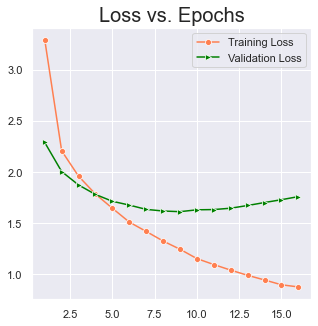

In [57]:
plot_learning_curve(h6)

In [58]:
loss, acc = model6.evaluate(X_test_vec, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 1ms/step - loss: 1.6002 - accuracy: 0.6313
Testing Accuracy:  63.12981843948364


<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Metrics: </span></strong></li>
</ul></h3>

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Simple Feed-Forward Net using Embedding Layer</td>
    <td></td>
  </tr>
<tr>
    <td>Feed-Forward + Batch Norm</td>
    <td></td>
  </tr>
<tr>
    <td>Feed-Forward + Dropout</td>
    <td></td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td></td>
  </tr>
<tr>
    <td>Convolution Blocks (Dimensionality Reduction) + LSTM</td>
    <td></td>
  </tr>
<tr>
    <td>TfIdf Vectors + Better train-test split + Feature Selection + Feed-forward Neural Net</td>
    <td>63</td>
  </tr>
</table>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"></span></strong></li>
</ul></h4>